In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#READ DATA
data = pd.read_csv("dataset.csv", encoding='ISO-8859-1')

data.head(10)

,label,Text
0,1,Keep the BGT tweets coming... for us in the US...
1,1,@mp3mad We did. Young one had to go to bed w...
2,1,http://is.gd/LpF9 any clickdensity users aroun...
3,0,gonna knit a felted heart toy for mum for Moth...
4,1,"@DarkPiano LOREN, emergency, this is lizrose. ..."
5,1,@jsi5 http://twitpic.com/7rrf7 - Looks like an...
6,0,@DQJ Thanks!
7,0,@saturnboy good job! So pretty
8,0,"@patembe Thanks for you translation, I will ad..."
9,1,today its another day and i will be ready for ...


In [ ]:
sample_data = data.sample(150000,replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import string
import re

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.data.path.append("C:/Users/Asus/nltk_data")  # Update the path if you’ve placed nltk_data elsewhere


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
import string
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
from collections import Counter

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Stopwords set (combining NLTK and spaCy stopwords)
stop_words = frozenset(stopwords.words('english')).union(spacy_stopwords)

# Dictionary of contractions and their expanded forms
abbreviation_map = {
    "isn't": "is not", "aren't": "are not", "can't": "cannot",
    "couldn't": "could not", "don't": "do not", "doesn't": "does not",
    "n't": "not", "'re": "are", "'ve": "have", "'ll": "will",
    "'d": "would", "'s": "is"
}

# Enhanced data cleaning function
def clean_text(text):
    # Convert to lowercase and handle abbreviations
    text = text.lower()
    for short_form, full_form in abbreviation_map.items():
        text = re.sub(rf"\b{re.escape(short_form)}\b", full_form, text)

    # Combine all regex replacements into a single call
    text = re.sub(
        r'http\S+|www\S+|https\S+|'        # URLs
        r'\b\w+@\w+\.\w+\b|'               # Emails
        r'@\w+|#\w+|'                      # Hashtags and mentions
        r'\d+|'                            # Digits
        r'[^\x00-\x7F]+|'                  # Non-English symbols
        r'\s+', ' ',                       # Excessive whitespace
        text
    )

    # Remove punctuation and trim whitespace
    return text.translate(str.maketrans('', '', string.punctuation)).strip()

# Tokenize, lemmatize, and filter by POS and stopwords in one step
def process_and_filter_text(text):
    tokens = word_tokenize(text)
    pos_tagged = pos_tag(tokens)
    filtered_words = []

    for word, tag in pos_tagged:
        # Exclude stopwords and unwanted POS tags (e.g., prepositions and conjunctions)
        if word in stop_words or tag in {'IN', 'CC'}:
            continue

        # Determine POS and lemmatize accordingly
        if tag.startswith('NN'):
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            lemma = lemmatizer.lemmatize(word, pos='a')
        elif tag.startswith('RB'):
            lemma = lemmatizer.lemmatize(word, pos='r')
        else:
            lemma = lemmatizer.lemmatize(word)

        filtered_words.append((lemma, tag))  # Append word with POS tag if it passes all filters

    return filtered_words

# Full data cleaning and preprocessing pipeline
def preprocess_data(text):
    cleaned_text = clean_text(text)
    return process_and_filter_text(cleaned_text)

# Apply the preprocessing function to the dataset
data = pd.read_csv("dataset.csv", encoding='ISO-8859-1')
data['Cleaned_Text_POS'] = data['Text'].apply(preprocess_data)

# Filter negative samples and analyze POS tags
negative_data = data[data['label'] == 1]

# Collect POS tags of words in negative texts
pos_tags_negative = Counter()
for row in negative_data['Cleaned_Text_POS']:
    pos_tags_negative.update(tag for _, tag in row)

# Display the most common POS tags associated with negative words
print("Most common POS tags in negative words:")
print(pos_tags_negative.most_common(10))

# Remove the POS tags to retain only the cleaned text for other uses
data['Cleaned_Text'] = data['Cleaned_Text_POS'].apply(lambda x: ' '.join(word for word, _ in x))

# Display the first 20 rows of the cleaned dataset with POS analysis
print(data.head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common POS tags in negative words:
[('NN', 202427), ('JJ', 71356), ('VB', 37394), ('NNS', 36678), ('VBP', 28933), ('VBG', 27313), ('VBD', 20823), ('RB', 19400), ('VBN', 14375), ('VBZ', 9592)]
    label                                               Text  \
0       1  Keep the BGT tweets coming... for us in the US...   
1       1  @mp3mad  We did.  Young one had to go to bed w...   
2       1  http://is.gd/LpF9 any clickdensity users aroun...   
3       0  gonna knit a felted heart toy for mum for Moth...   
4       1  @DarkPiano LOREN, emergency, this is lizrose. ...   
5       1  @jsi5 http://twitpic.com/7rrf7 - Looks like an...   
6       0                                      @DQJ Thanks!    
7       0                   @saturnboy good job!  So pretty    
8       0  @patembe Thanks for you translation, I will ad...   
9       1  today its another day and i will be ready for ...   
10      0  @Sharonyy Haha your right  I haven't even thou...   
11      1       @mitchelmusso u wil

Most common POS tags in negative words:
NN: 202427
JJ: 71356
VB: 37394
NNS: 36678
VBP: 28933
VBG: 27313
VBD: 20823
RB: 19400
VBN: 14375
VBZ: 9592
CSV file saved as pos_tags_negative_words.csv


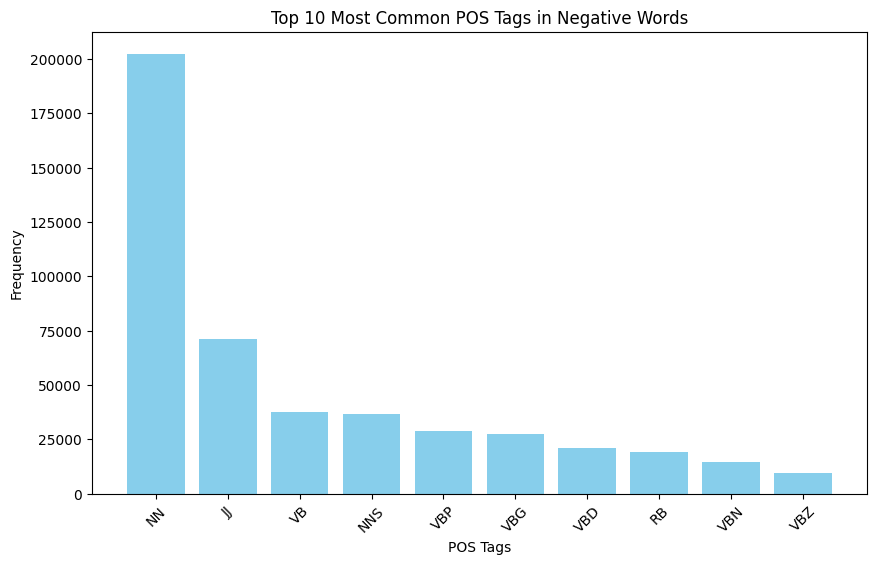

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming `negative_data` is already defined and contains rows with 'label' == 1
# and `Cleaned_Text_POS` is a list of tuples [(word, POS_tag), ...]

# Collect POS tags from negative samples
pos_tags_negative = Counter()
for row in negative_data['Cleaned_Text_POS']:
    pos_tags_negative.update(tag for _, tag in row)

# Display the most common POS tags with their counts
print("Most common POS tags in negative words:")
for tag, count in pos_tags_negative.most_common(10):
    print(f"{tag}: {count}")

# Convert to DataFrame for easier plotting and saving
pos_tag_df = pd.DataFrame(pos_tags_negative.most_common(10), columns=['POS_Tag', 'Count'])

# Save the DataFrame to a CSV file
pos_tag_df.to_csv("pos_tags_negative_words.csv", index=False)
print("CSV file saved as pos_tags_negative_words.csv")

# Plotting the POS tag distribution for negative words
plt.figure(figsize=(10, 6))
plt.bar(pos_tag_df['POS_Tag'], pos_tag_df['Count'], color='skyblue')
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common POS Tags in Negative Words")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='label'>

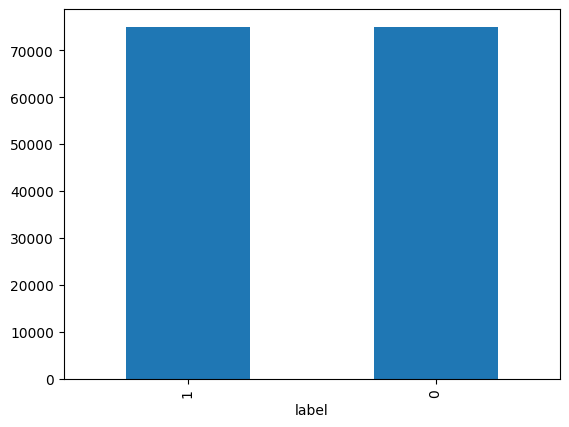

In [ ]:
sample_data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

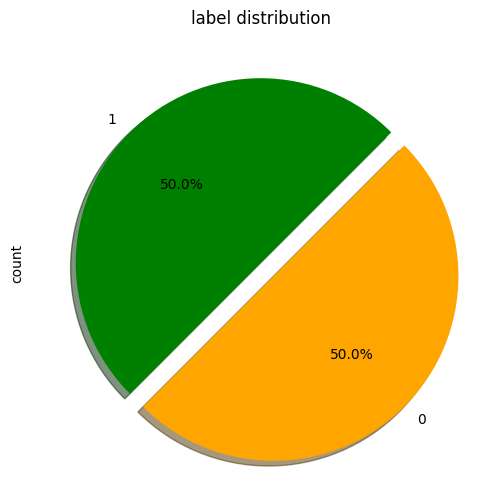

In [ ]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
sample_data['label'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Preprocess the dataset

data = pd.read_csv("dataset.csv", encoding='ISO-8859-1')

# Sampling and text processing
sample_data = data.sample(150000, replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['label']

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
max_len = max(len(seq) for seq in X_sequences)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=1)

# Building the bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 410s 214ms/step - accuracy: 0.6355 - loss: 0.7488 - val_accuracy: 0.7977 - val_loss: 0.4579
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 343s 183ms/step - accuracy: 0.8063 - loss: 0.4489 - val_accuracy: 0.8144 - val_loss: 0.4300
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 304s 162ms/step - accuracy: 0.8298 - loss: 0.4085 - val_accuracy: 0.8245 - val_loss: 0.4094
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 305s 163ms/step - accuracy: 0.8506 - loss: 0.3706 - val_accuracy: 0.8387 - val_loss: 0.3910
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 278s 148ms/step - accuracy: 0.8705 - loss: 0.3378 - val_accuracy: 0.8476 - val_loss: 0.3701
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 306s 163ms/step - accuracy: 0.8886 - loss: 0.3061 - val_accuracy: 0.8623 - val_loss: 0.3542
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 306s 163ms/step - accuracy: 0.9011 - loss: 0.2779 - val_accuracy: 0.8665 - val_loss: 0.3421
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 309s 165ms/step - ac

LSTM small dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv("dataset.csv", encoding='ISO-8859-1')

# Sample the data to 10k rows
sample_data = data.sample(10000, replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['label']

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
max_len = max(len(seq) for seq in X_sequences)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=1)

# Building the bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.5025 - loss: 1.5124 - val_accuracy: 0.5185 - val_loss: 0.7007
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.5359 - loss: 0.6938 - val_accuracy: 0.6265 - val_loss: 0.6588
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.6802 - loss: 0.6232 - val_accuracy: 0.7200 - val_loss: 0.5785
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.7734 - loss: 0.5204 - val_accuracy: 0.7185 - val_loss: 0.5914
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.7948 - loss: 0.4870 - val_accuracy: 0.6970 - val_loss: 0.6082
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.8546 - loss: 0.3980 - val_accuracy: 0.7345 - val_loss: 0.5621
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.8769 - loss: 0.3441 - val_accuracy: 0.7360 - val_loss: 0.5819
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.8894 - loss: 0

# SVM


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


sample_data['Text'] = sample_data['Text'].fillna('')

texts = sample_data['Text'].values
labels = sample_data['label'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.76


SVM Small Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Ensure no missing values in the Text column
sample_data['Text'] = sample_data['Text'].fillna('')

# Limit to 10,000 samples
sample_data = sample_data.sample(n=10000, random_state=42)

texts = sample_data['Text'].values
labels = sample_data['label'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

# Detailed classification report
print(classification_report(y_test, y_pred))


Test Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       994
           1       0.74      0.76      0.75      1006

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



# naive_bayes


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

texts = sample_data['Text'].values
labels = sample_data['label'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features (words)

# Handle NaN values by replacing them with an empty string before fitting the vectorizer
X_train = [str(x) if not pd.isnull(x) else '' for x in X_train]
X_test = [str(x) if not pd.isnull(x) else '' for x in X_test]

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.75


Small naive bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Ensure no missing values in the Text column
sample_data['Text'] = sample_data['Text'].fillna('')

# Limit to 10,000 samples
small_sample = sample_data.sample(n=10000, random_state=42)

texts = small_sample['Text'].values
labels = small_sample['label'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features (words)

# Handle NaN values by replacing them with an empty string before fitting the vectorizer
X_train = [str(x) if not pd.isnull(x) else '' for x in X_train]
X_test = [str(x) if not pd.isnull(x) else '' for x in X_test]

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')




Test Accuracy: 0.73
